# Assignment for Business Analyst Intern at Jar
* Name: Sandesh Ravindra Bhat
* Email id: sandeshrbhat24@gmail.com
* Tools used: Python

This same file in .pynb format is available here for the reference: 

## Question 1 
### Part 1: Sales and Profitability Analysis
    1. Merge the List of Orders and Order Details datasets on the basis of Order ID.
    Calculate the total sales (Amount) for each category across all orders.

Answer:


In [1]:
import pandas as pd
import numpy as np


In [2]:
order_details = pd.read_csv("jar_assignment/43FA02A7.csv")
orders = pd.read_csv("jar_assignment/AD8570FD.csv")

In [26]:
merged_inner = pd.merge(orders, order_details, on  = "Order ID", how  = "inner")

In [27]:
merged_inner.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


2. For each category, calculate the average profit per order and total profit margin
(profit as a percentage of Amount).

Answer: 

In [30]:
group = merged_inner.groupby("Category").agg(
    total_profit = ('Profit','sum'),
    total_amount = ('Amount','sum'),
    total_orders = ('Order ID', 'nunique')
)
group

,total_profit,total_amount,total_orders
Category,,,
Clothing,11163.0,139054.0,393
Electronics,10494.0,165267.0,204
Furniture,2298.0,127181.0,186


In [168]:
group["Average Profit per order"] = group["total_profit"]/group["total_orders"]


In [169]:
group["Total Profit Margin"] =100* (group['total_profit']/group['total_amount'])
group

,total_profit,total_amount,total_orders,Average Profit per order,Total Profit Margin
Category,,,,,
Clothing,11163.0,139054.0,393,28.404580,8.027817
Electronics,10494.0,165267.0,204,51.441176,6.349725
Furniture,2298.0,127181.0,186,12.354839,1.806874


3.  Identify the top-performing and underperforming categories based on these
metrics. Also, suggest reasons for their performance differences.

### Answer:  
* The top-performing category is the Clothing category. The key reason behind this category being top-performing is the volume of orders, which is 393, and this drives the total profit higher. It also has decent profits and good profit margins, which suggests that it has low costs and good pricing.
   
* The underperforming category in the given dataset is the Furniture category. The reason behind the Furniture category being the underperformer is the low average profit per order and the lowest profit margin amongst other categories.

   
* The Electronics category lies in between the two categories and can also be assumed as a strong-performing category because of its total profit margin and average profit per order.


### Part 2: Target Achievement Analysis

1. Using the Sales Target dataset, calculate the percentage change in target sales
for the Furniture category month-over-month.

Answer:

In [56]:
sales_target = pd.read_csv("jar_assignment/BB480A52.csv")
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [59]:
sales_target["Month of Order Date"] = pd.to_datetime(sales_target['Month of Order Date'],format = "%b-%y")
sales_target.head()

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0


In [60]:
furniture_sales = sales_target[sales_target["Category"] == 'Furniture'].copy()

In [171]:
target= furniture_sales.groupby("Month of Order Date")["Target"].sum().reset_index()
target["MoM change percentage"] = (target["Target"].pct_change()*100).round(2)
target

,Month of Order Date,Target,MoM change percentage
0,2018-04-01,10400.0,NaN
1,2018-05-01,10500.0,0.96
2,2018-06-01,10600.0,0.95
3,2018-07-01,10800.0,1.89
4,2018-08-01,10900.0,0.93
5,2018-09-01,11000.0,0.92
6,2018-10-01,11100.0,0.91
7,2018-11-01,11300.0,1.80
8,2018-12-01,11400.0,0.88
9,2019-01-01,11500.0,0.88


2. Analyse the trends to identify months with significant target fluctuations.
Suggest strategies for aligning target expectations with actual performance
trends.

Answer:

In [172]:
sales_target = sales_target.sort_values("Month of Order Date")
sales_target ["Target_percent_change"] = (sales_target.groupby("Category")["Target"].pct_change()* 100).round(2)
sales_target.head()

,Month of Order Date,Category,Target,Target_percent_change
0,2018-04-01,Furniture,10400.0,NaN
24,2018-04-01,Electronics,9000.0,NaN
12,2018-04-01,Clothing,12000.0,NaN
1,2018-05-01,Furniture,10500.0,0.96
25,2018-05-01,Electronics,9000.0,0.00


In [92]:
fluctuation = sales_target[abs(sales_target["Target_percent_change"]) >2]
print(fluctuation[['Month of Order Date', 'Category', 'Target', 'Target_percent_change']])

   Month of Order Date     Category   Target  Target_percent_change
15          2018-07-01     Clothing  14000.0                  16.67
18          2018-10-01     Clothing  16000.0                  14.29
33          2019-01-01  Electronics  16000.0                  77.78


Answer:

The months where there were significant fluctuations are July 2018 and October 2018 for the Clothing category. The month of January 2019 saw significant fluctuation for the Electronics category, while there was no significant fluctuation in the Furniture category, with all variations remaining under 2 percent.

To practically align target expectations with actual performance trends:

* We might have to adopt a more data-driven target-setting process. This will allow us to use historical sales trends and any seasonal effects to set targets monthly.
* 
* It will be more ideal to apply category-specific targeting strategies. For example, we could use linear forecasting for the Furniture category, seasonal trend models for Clothing, and for Electronics, targets would be based on any launch events or offers.


### Part 3: Regional Performance Insights

1. From the List of Orders dataset, identify the top 5 states with the highest order
count. For each of these states, calculate the total sales and average profit.

Answer:

In [144]:
merged_inner.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [175]:
state_order_counts = merged_inner['State'].value_counts()
top_5_states =state_order_counts.head(5)
pd.DataFrame(top_5_states)

,count
State,
Madhya Pradesh,340
Maharashtra,290
Gujarat,87
Rajasthan,74
Delhi,74


In [176]:
top_5_states =state_order_counts.head(5).index.tolist()
top_states = merged_inner[merged_inner["State"].isin(top_5_states)]
#top_states["State"].unique()
stats = top_states.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),  # Sum of sales
    Average_Profit=('Profit', 'mean'),  # Mean profit
    Order_Count=('Order ID', 'count')  # Verify order count
).sort_values('Order_Count', ascending=False)

In [177]:
stats

,Total_Sales,Average_Profit,Order_Count
State,,,
Madhya Pradesh,105140.0,16.326471,340
Maharashtra,95348.0,21.296552,290
Gujarat,21058.0,5.344828,87
Delhi,22531.0,40.364865,74
Rajasthan,21149.0,16.986486,74


2. Highlight any regional disparities in sales or profitability. Suggest regions or cities
that should be prioritized for improvement.

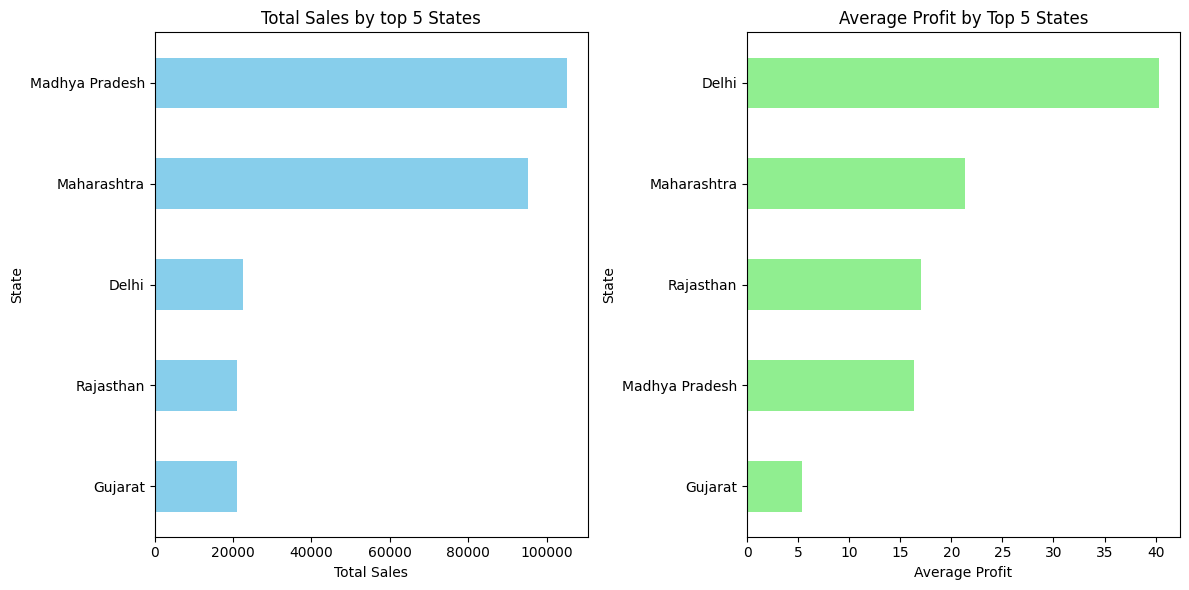

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
stats["Total_Sales"].sort_values().plot(kind='barh', color='skyblue')
plt.title("Total Sales by top 5 States")
plt.xlabel("Total Sales")

plt.subplot(1, 2, 2)
stats['Average_Profit'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Profit by Top 5 States')
plt.xlabel('Average Profit')

plt.tight_layout()
plt.show()

#### Answer
* After observing the above graphs, we can clearly see that Madhya Pradesh has the highest total sales, but its average profit is lower compared to the other three states. Although Delhi has average sales among the top five states, its average profit is the highest in comparison.
  
* Regions such as Gujarat should be prioritized for improvement, as it has the lowest total sales as well as the lowest average profit among the top five states. Additionally, we might explore ways to optimize Madhya Pradesh's product strategy to increase its average profit, leveraging its already high total sales.

## Question 2
App Exploration: 
Explore the features and user experience of the Jar app. Highlight five things you found
particularly eEective and user-friendly. Additionally, identify five areas where
improvements could be made, providing your reasoning for each suggestion.

Answer:

The five effective and user friendly features and functions are as follows:

* Gold price Drop button and Chartings: The quick button on the home screen, alerting users to a drop in gold buy price, is highly effective. Tapping this immediately displays interactive chart of gold prices per gram in INR. The ability to toggle between various timeframes provides a quick, trading-chart like overview, which empowers users with timely information for the informed purchase decisions. This featue significantly enchances the app's utility for active users

* Smooth UPI Intergration: The app offered a smooth and almost instantaneous UPI setup process. Whether intitiated during initial onboarding or later via settings section, the ease of linking UPI for transaction improves the user experience and saves time.

* Flexible Saving plans: The inclusion of "Savings plan" feature, allowing users to setup recurring weekly and monthly contributions, is a strong point.

* In app Support options: The easily discoverable "Support" section within the transaction tab is great. Unlike many conventional applications, it provides a direct and readily accessible support button, enabling users to quickly find answers to their queries and solutions to common issues.

* Language options: With 10 options available, this app provides commitment to wide inclusivity in terms of linguistic support.

The five areas of improvement are as follows:
* Reordering of Bottom navigation tabs (Nek Tab): The current placement of Nek tab before Transactions tab in the bottom navigation bar could be re-evaluated. Given that transactions are often high priority function for users managing their finances, placing the Transactions tab in a more prominent position would likely enchance the user flow and accessibility.

* Streamlining in-app graphics and imagery: The app currently features numerous diagrams and images that appear excessive and, at times, detract from the overall aesthetic and theme of the application. A more minimalistic approach to graphics would improve visual coherence, reduce potential cognitive load and reduce clutter.

* Prioritization of "Refer and Earn" Placement: This option is currently positioned quite early within the profile's quick view section. From a user perspective, positioning it to a later position would allow users to prioritize core functionalites before encountering promotional features.

* Add gold-centric information on home tab: While visually appealing, the home tab could benefit from dsiplaying more direct information and relevant news having gold trends and market insights. Prioritizing gold-related content on the main screen would directly align with the app's primary function.

* Strengthening Personal information security (Age modification): The ease with which users can modify their age within the app, seemingly without requiring two factor authentication or similar verification step, presents a security vulnerability. For critical personal information, implementing verification methods would significantly enhance data integrity and user account security.

## Question 3
Product Exploration:
The Jar app provides users with an innovative way to save and invest in digital gold,
starting with as little as ₹10. It automates savings and investments, making financial
planning seamless and accessible. As the first Made-in-India app to pioneer such a
solution, Jar has successfully created a niche in automated savings and investment.

Building on its strong foundation and leveraging its existing user base and trust, what
are some new business opportunities Jar could venture into, to expand its oEerings and
enhance user engagement? Discuss how the app can utilize its strengths, such as
automation, a user-friendly design, and established credibility, to seamlessly integrate
these new services, deepen its value proposition, and achieve significant milestones in
the financial ecosystem.

Answer:

Building on the foundational strengths, Jar can expand its offerings into new generation business opportunities such as:
1. Personalized, Financial wellness and advisory: This can transform into a intelligent co-pilot. the user data and potential use of advanced AI can help Jar offer real time personalized nudges in terms of spending  habits, debt management and diversified small investments. The final goal could be to make financial discipline effortless and easy.

2. Introduce impact investing: Jar can modernize and formalize traditional savings and credits systems like chit funds and digitize them by linking it with small ticket to help small projects. This could help bridge the gap between MSME's funding requirements.

3. Fractional ownership in unusual and underserved assets: Other than gold and company shares, Jar can introduce ownership in high value, but low liquid assets like royalities and patents and specialized equipments like solar and electric mobility. The unique approach could potentially create a low entry point for investors with less capital to deploy and foster new ways of wealth creation and diversification.